In [1]:
import numpy as np
import pandas as pd
from numpy.linalg import inv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('weather.csv')
data

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


In [3]:
data['Formatted Date'] = pd.to_datetime(data['Formatted Date'], utc=True)
data['Year'] = data['Formatted Date'].dt.year
data['DayOfYear'] = data['Formatted Date'].dt.dayofyear
data.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Year,DayOfYear
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,2006,90
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,2006,90
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,2006,91
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,2006,91
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,2006,91


In [4]:
avgDayTemperature = data.groupby(['DayOfYear', 'Year'])['Temperature (C)'].mean().reset_index()
avgDayTemperature

,DayOfYear,Year,Temperature (C)
0,1,2006,4.075000
1,1,2007,3.806713
2,1,2008,-5.663194
3,1,2009,-4.850926
4,1,2010,7.807407
...,...,...,...
4014,365,2015,-4.304861
4015,365,2016,0.117593
4016,366,2008,-6.218056
4017,366,2012,-3.249306


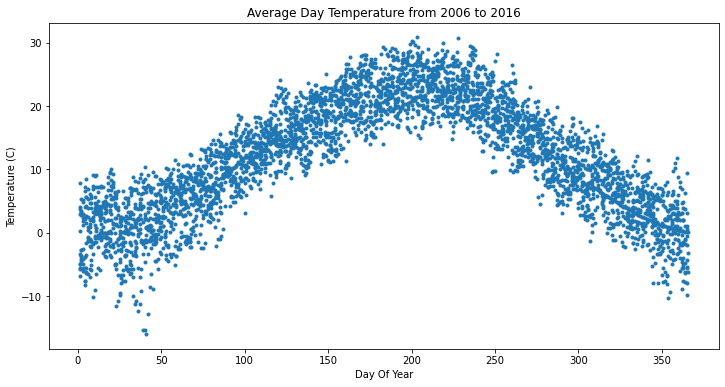

In [5]:
plt.figure(figsize=(12, 6))
plt.scatter(avgDayTemperature['DayOfYear'], avgDayTemperature['Temperature (C)'], marker='.')
plt.xlabel('Day Of Year')
plt.ylabel('Temperature (C)')
plt.title('Average Day Temperature from 2006 to 2016')
plt.show()

In [9]:
class Perceptron:
    def __init__(self, epochs=1, lr=0.000001):
        # set hyperParameters
        self.w = np.random.rand(1, 1)
        self.b = np.random.rand(1, 1)
        self.lr = lr
        self.epochs = epochs

        self.W = []
        self.B = []
        self.loss = []
        self.R2 = []
    def fit(self, x_train, y_train):
        for epoch in range(self.epochs):
            for i in range(len(x_train)):    
                y_pred = np.matmul(x_train[i], self.w) + self.b
                e = y_train[i] - y_pred
                self.w = self.w + e * self.lr * x_train[i]
                self.b = self.b + e * self.lr
                
                Y_pred = np.matmul(x_train, self.w)
                error = np.mean(np.abs(y_train - Y_pred))
                
                self.loss.append(error)
                self.R2.append(r2_score(y_train, Y_pred))
                self.W.append(self.w)
                self.B.append(self.b)

        np.save('hyperParameters_w_b.npy', self.W + self.B)

    def predict(self, x):
        y_pred = np.matmul(x, self.w) + self.b
        return y_pred

    def evaluate(self, X, Y):
        y_pred = np.matmul(X, self.w) + self.b
        MSE = mean_squared_error(Y, y_pred)
        R2 = r2_score(Y, y_pred)
        return R2, MSE

    def get_loss(self):
        return self.loss

    def get_R2(self):
        return self.R2

In [10]:
X = avgDayTemperature['DayOfYear'].values.reshape(-1, 1)
Y = avgDayTemperature['Temperature (C)'].values.reshape(-1, 1)
X.shape

(4019, 1)

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=24)

In [23]:
perceptron = Perceptron(epochs=1, lr=0.000001)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X)
r2, mse = perceptron.evaluate(X_test, Y_test)
print(f'MSE: {mse}')

NameError: name 'r2_score' is not defined

NameError: name 'Y_pred' is not defined

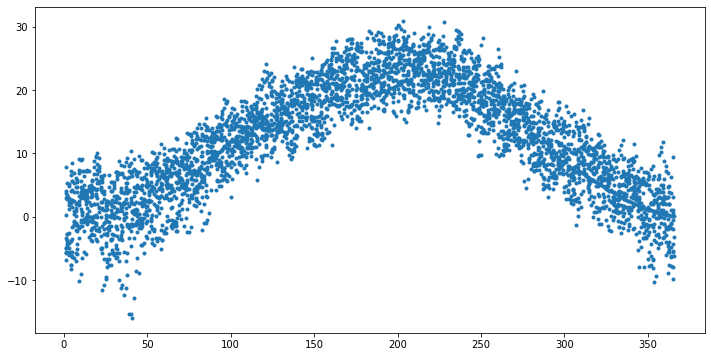

In [24]:
plt.figure(figsize=(12, 6))
plt.scatter(X, Y, marker='.', label='Data')
plt.plot(X, Y_pred, color='red', lw=4, label='Fitted line')
plt.xlabel('Day Of Year')
plt.ylabel('Temperature (C)')
plt.title('Average Day Temperature from 2006 to 2016')
plt.legend(loc='best')
plt.show()

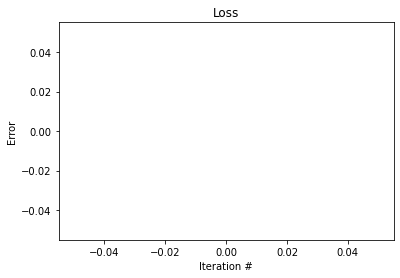

In [26]:
loss = perceptron.get_loss()
plt.plot(loss[20:])
plt.xlabel('Iteration #')
plt.ylabel('Error')
plt.title('Loss')
plt.show()

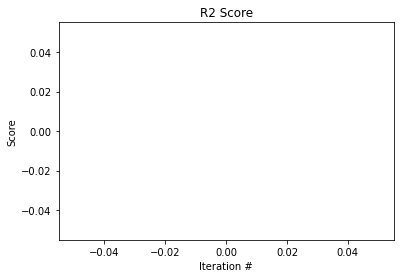

In [27]:
r2 = perceptron.get_R2()
plt.plot(list(map(abs, r2[20:])), lw=0.7) # we start plotting for 20< because first iterates has large digits
plt.xlabel('Iteration #')
plt.ylabel('Score')
plt.title('R2 Score')
plt.show()